In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
%cd ..

/home/matier/work/dphil/deep-ltl


/home/matier/miniconda3/envs/deepltl/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
def smooth(row, radius):
    """
    Computes the moving average over the given row of data. Returns an array of the same shape as the original row.
    """
    y = np.ones(radius)
    z = np.ones(len(row))
    return np.convolve(row, y, 'same') / np.convolve(z, y, 'same')

In [5]:
import os
os.listdir('experiments/ppo/PointLtl2-v0/fixed_random_neg_1')
str.isnumeric('12323123a')

False

In [25]:
def process_logs(experiment, smooth_radius=100):
    path = f'experiments/ppo/PointLtl2-v0/{experiment}'
    seeds = [int(x) for x in os.listdir(path) if os.path.isdir(f'{path}/{x}') and str.isnumeric(x)]
    dfs = []
    for seed in seeds:
        df = pd.read_csv(f'{path}/{seed}/log.csv')
        df['alg'] = experiment
        df['smooth'] = smooth(df['return_per_episode_mean'], smooth_radius)
        df['seed'] = seed
        for col in ['return_per_episode_mean', 'adr', 'arps']:
            df[f'{col}_smooth'] = smooth(df[col], smooth_radius)
        dfs.append(df)
    return pd.concat(dfs)

In [33]:
exp = 'fixed_random_neg_1'
df = process_logs(exp, smooth_radius=10)

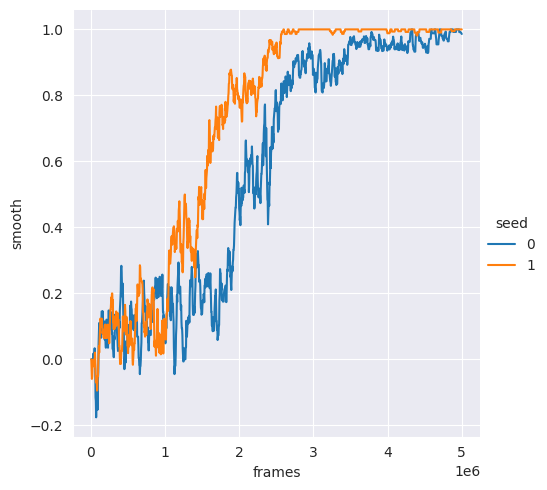

In [35]:
sns.relplot(df, x='frames', y='smooth', kind='line', hue='seed', errorbar='sd')

In [15]:
df

,adr,arps,entropy,fps,frames,grad_norm,num_frames_per_episode_mean,num_frames_per_episode_std,policy_loss,remaining,return_per_episode_mean,return_per_episode_std,value,value_loss,alg,smooth,seed
0,-0.033509,-0.000217,1.301092,1746.077641,4096,0.117325,778.800000,206.652752,0.037299,0:47:41,-0.2,0.748331,0.502015,0.012343,fixed_random_neg_1,0.035132,0
1,0.000000,0.000000,1.321953,1769.759279,8192,0.024993,1000.000000,0.000000,0.011182,0:47:00,0.0,0.000000,0.203464,0.001721,fixed_random_neg_1,0.029541,0
2,0.093837,0.000528,1.346232,1765.129648,12288,0.017518,875.800000,248.400000,0.004138,0:47:05,0.2,0.400000,0.160992,0.003410,fixed_random_neg_1,0.025127,0
3,0.000000,0.000000,1.387178,1756.400271,16384,0.033866,1000.000000,0.000000,0.013476,0:47:17,0.0,0.000000,0.217342,0.001111,fixed_random_neg_1,0.024653,0
4,-0.067156,-0.000374,1.481281,1739.528896,20480,0.053804,835.000000,260.333632,0.023981,0:47:42,0.0,0.632456,0.411978,0.006844,fixed_random_neg_1,0.031604,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,0.721020,0.006975,1.692213,1735.348735,4984832,0.013178,169.136364,70.605366,0.000196,0:00:08,1.0,0.000000,0.805586,0.000446,fixed_random_neg_1,0.999043,1
1217,0.717940,0.007509,1.692213,1731.168904,4988928,0.013903,176.680000,105.770968,-0.000614,0:00:06,1.0,0.000000,0.826597,0.000370,fixed_random_neg_1,0.999025,1
1218,0.690741,0.006438,1.692213,1667.435121,4993024,0.013594,194.666667,97.410928,0.002636,0:00:04,1.0,0.000000,0.817763,0.000391,fixed_random_neg_1,0.999007,1
1219,0.686454,0.006521,1.692213,1717.938816,4997120,0.011839,195.200000,79.040876,0.002499,0:00:01,1.0,0.000000,0.808389,0.000204,fixed_random_neg_1,0.998988,1


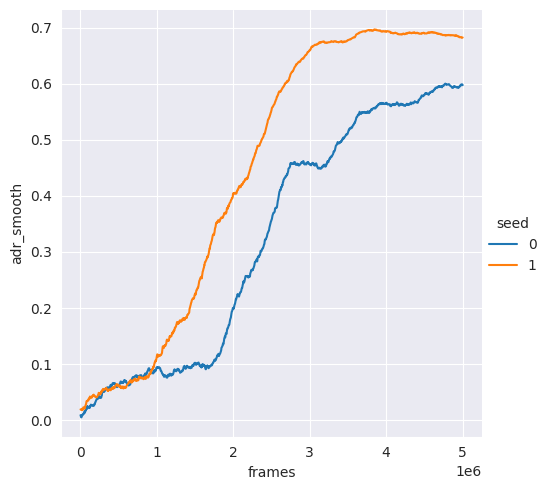

In [31]:
sns.relplot(df, x='frames', y='adr_smooth', kind='line', hue='seed')

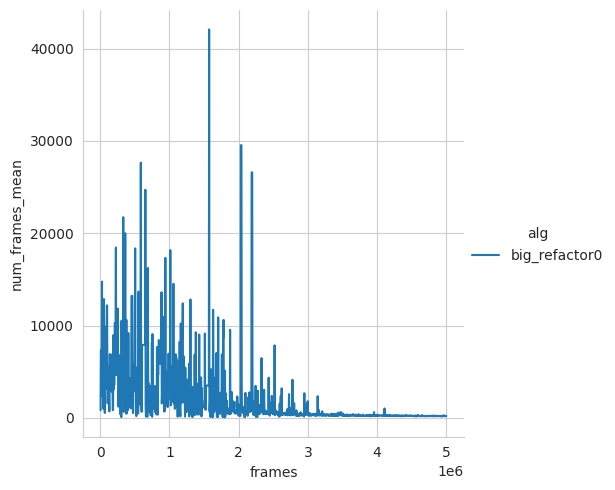

In [16]:
sns.relplot(df[df['alg'] =='big_refactor0'], x='frames', y='num_frames_mean', kind='line', hue='alg')